In [1]:
# importing critical libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas                      as pd             # data science essentials
import matplotlib.pyplot           as plt            # essential graphical output
import seaborn                     as sns            # enhanced graphical output
import statsmodels.formula.api     as smf            # regression modeling
import numpy                       as np             # mathematical essentials
import sklearn.linear_model                          # linear modeling in scikit-learn
from sklearn.model_selection import train_test_split # train/test split
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor # gbm
from sklearn.linear_model import LogisticRegression  #logistic regression
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.metrics import roc_auc_score            #roc_auc_score scoring
from sklearn.metrics import confusion_matrix         #confusion matrix
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting


# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))       

Let's Import and read the datasets from the train and test excel files.

In [2]:
# importing the training dataset
path             = "./"
training_dataset = "train.csv"

# reading in the .csv file with pandas
sportify_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

# checking basic info about the dataset
sportify_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20553 entries, 0 to 20552
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             20553 non-null  object 
 1   artist            20553 non-null  object 
 2   uri               20553 non-null  object 
 3   danceability      20553 non-null  float64
 4   energy            20553 non-null  float64
 5   key               20553 non-null  int64  
 6   loudness          20553 non-null  float64
 7   mode              20553 non-null  int64  
 8   speechiness       20553 non-null  float64
 9   acousticness      20553 non-null  float64
 10  instrumentalness  20553 non-null  float64
 11  liveness          20553 non-null  float64
 12  valence           20553 non-null  float64
 13  tempo             20553 non-null  float64
 14  duration_ms       20553 non-null  int64  
 15  time_signature    20553 non-null  int64  
 16  chorus_hit        20553 non-null  float6

In [3]:
# importing the training dataset
path             = "./"
testing_dataset  = 'test.csv'

# importing the testing dataset
sportify_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)

# checking basic info about the dataset
sportify_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20553 entries, 0 to 20552
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             20553 non-null  object 
 1   artist            20553 non-null  object 
 2   uri               20553 non-null  object 
 3   danceability      20553 non-null  float64
 4   energy            20553 non-null  float64
 5   key               20553 non-null  int64  
 6   loudness          20553 non-null  float64
 7   mode              20553 non-null  int64  
 8   speechiness       20553 non-null  float64
 9   acousticness      20553 non-null  float64
 10  instrumentalness  20553 non-null  float64
 11  liveness          20553 non-null  float64
 12  valence           20553 non-null  float64
 13  tempo             20553 non-null  float64
 14  duration_ms       20553 non-null  int64  
 15  time_signature    20553 non-null  int64  
 16  chorus_hit        20553 non-null  float6

In [4]:
#Setting the colums for joining the two datasets
sportify_train['set'] = 'Training'
sportify_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
sportify_df = sportify_train.append(other = sportify_test)

# resetting index to avoid problems later in the code
sportify_df.reset_index(drop = False,
                       inplace = True)

C:\Users\domuy\AppData\Local\Temp\ipykernel_41476\1287500941.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sportify_df = sportify_train.append(other = sportify_test)


In [5]:
#checking for missing values
sportify_df.isnull().sum()

index                   0
track                   0
artist                  0
uri                     0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
duration_ms             0
time_signature          0
chorus_hit              0
sections                0
Hit_or_Flop         20553
Era                     0
id                      0
set                     0
dtype: int64

In [6]:
#viewing the initial rows of the data
sportify_df

,index,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Hit_or_Flop,Era,id,set
0,0,Tender Lover,Babyface,spotify:track:00GfGwzlSB8DoA0cDP2Eit,0.743,0.860,5,-6.346,1,0.0445,...,0.687,102.459,259267,4,24.69920,11,1.0,80s,20953,Training
1,1,Seven Years,Saosin,spotify:track:0C71NJD4BhvPopTwI7a8KV,0.239,0.941,2,-4.535,0,0.0967,...,0.223,81.844,192787,3,73.08865,8,0.0,00s,30386,Training
2,2,Boy With Luv,BTS Featuring Halsey,spotify:track:5KawlOMHjWeUjQtnuRs22c,0.645,0.862,11,-4.757,0,0.0965,...,0.798,119.991,229773,4,48.23827,9,1.0,10s,39282,Training
3,3,It's All Gone,The Black,spotify:track:6RqoK0u9y12yVb0WKifoQk,0.363,0.907,2,-6.123,1,0.0533,...,0.343,97.922,259800,4,96.69484,9,0.0,10s,37222,Training
4,4,Beng Beng Beng,Femi Kuti,spotify:track:1kWpqQq33VAcMZCS0YOQqq,0.759,0.879,5,-7.717,0,0.0751,...,0.910,126.007,286000,4,47.25379,13,0.0,90s,24866,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,20548,Let's Rock Shall We,Throwing Toasters,spotify:track:1qUnuTDWPZTmeJtUwNQqII,0.511,0.415,2,-11.279,1,0.8220,...,0.520,99.449,23133,5,0.00000,2,NaN,00s,32458,Testing
41102,20549,Magic Moon (Clair De Lune),The Rays,spotify:track:4lD1obJ7EeHuKwpKJHIPIr,0.485,0.351,10,-9.872,1,0.0253,...,0.292,102.672,174613,3,99.01630,7,NaN,60s,5965,Testing
41103,20550,Go Cry On Somebody Else's Shoulder,Frank Zappa,spotify:track:4SAiI9koFUN4Mb23aSjsWc,0.464,0.374,0,-13.555,1,0.0319,...,0.575,100.933,221000,3,42.77961,7,NaN,60s,8142,Testing
41104,20551,Downtown,Mrs. Miller,spotify:track:5pRgsodSwssdCAEXnY1cg3,0.563,0.458,7,-8.958,1,0.0739,...,0.523,128.142,175933,4,41.32793,9,NaN,60s,8405,Testing


In [7]:
sportify_df["track"].value_counts()

Falling                       17
Angel                         13
Crazy                         12
You                           12
Hold On                       12
                              ..
God Bless Whoever Sent You     1
U Got It Bad                   1
I Still Love Him So            1
You Got Me Hummin              1
Break Up In The End            1
Name: track, Length: 35860, dtype: int64

In [8]:
# Get value counts of "track" column
track_counts = sportify_df['track'].value_counts()
# Convert value counts Series to DataFrame and reset index
track_counts_df = track_counts.reset_index()

# Rename columns of new DataFrame
track_counts_df.columns = ['track', 'count']

# Merge new DataFrame back into original DataFrame
spotify_df = pd.merge(sportify_df, track_counts_df, on='track')

# Print updated DataFrame
print(sportify_df)

       index                               track                artist  \
0          0                        Tender Lover              Babyface   
1          1                         Seven Years                Saosin   
2          2                        Boy With Luv  BTS Featuring Halsey   
3          3                       It's All Gone             The Black   
4          4                      Beng Beng Beng             Femi Kuti   
...      ...                                 ...                   ...   
41101  20548                 Let's Rock Shall We     Throwing Toasters   
41102  20549          Magic Moon (Clair De Lune)              The Rays   
41103  20550  Go Cry On Somebody Else's Shoulder           Frank Zappa   
41104  20551                            Downtown           Mrs. Miller   
41105  20552                 Break Up In The End         Cole Swindell   

                                        uri  danceability  energy  key  \
0      spotify:track:00GfGwzlSB8DoA0c

In [ ]:
sportify_df.columns

In [7]:
sportify_df['Era_New'] = 0

for index, value in sportify_df.iterrows():
    if sportify_df.loc[index, 'Era'] == "60s":
        sportify_df.loc[index, 'Era_New'] = 1
    if sportify_df.loc[index, 'Era'] == "70s":
        sportify_df.loc[index, 'Era_New'] = 2
    if sportify_df.loc[index, 'Era'] == "80s":
        sportify_df.loc[index, 'Era_New'] = 3
    if sportify_df.loc[index, 'Era'] == "10s":
        sportify_df.loc[index, 'Era_New'] = 4
    if sportify_df.loc[index, 'Era'] == "00s":
        sportify_df.loc[index, 'Era_New'] = 5
    if sportify_df.loc[index, 'Era'] == "90s":
        sportify_df.loc[index, 'Era_New'] = 6    

In [8]:
sportify_new = sportify_df.drop(columns=["index", "track","uri", "artist",
                        "id"], axis=1)[ sportify_df['set'] == 'Training' ]
numeric = [x for x in sportify_new.columns if sportify_new[x].nunique() > 15]
numeric

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'chorus_hit',
 'sections']

In [9]:
sportify_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Hit_or_Flop,Era,set,Era_New
0,0.743,0.860,5,-6.346,1,0.0445,0.226000,0.000422,0.0513,0.687,102.459,259267,4,24.69920,11,1.0,80s,Training,3
1,0.239,0.941,2,-4.535,0,0.0967,0.000023,0.000002,0.3270,0.223,81.844,192787,3,73.08865,8,0.0,00s,Training,5
2,0.645,0.862,11,-4.757,0,0.0965,0.092300,0.000000,0.1920,0.798,119.991,229773,4,48.23827,9,1.0,10s,Training,4
3,0.363,0.907,2,-6.123,1,0.0533,0.000023,0.000036,0.3030,0.343,97.922,259800,4,96.69484,9,0.0,10s,Training,4
4,0.759,0.879,5,-7.717,0,0.0751,0.018000,0.002320,0.0645,0.910,126.007,286000,4,47.25379,13,0.0,90s,Training,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20548,0.291,0.804,9,-8.329,1,0.0628,0.149000,0.000005,0.2980,0.483,178.046,249533,4,31.34195,11,1.0,90s,Training,6
20549,0.521,0.956,1,-5.440,1,0.0367,0.002200,0.006830,0.0998,0.801,158.023,295200,4,24.34232,14,0.0,90s,Training,6
20550,0.633,0.823,5,-5.792,1,0.0287,0.051600,0.000496,0.1880,0.444,115.107,330533,4,38.00494,19,1.0,80s,Training,3
20551,0.292,0.964,2,-5.272,1,0.0935,0.000003,0.654000,0.1690,0.462,93.395,114040,4,33.43167,7,0.0,00s,Training,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the scaler
scaler = MinMaxScaler()
sportify_sc = sportify_df[['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'chorus_hit',
 'sections']].copy()[ sportify_df['set'] == 'Training' ]
# Scale the features
scaled_data = scaler.fit_transform(sportify_sc)

# Convert the scaled data back to a pandas DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=sportify_sc.columns)

# Print the first five rows of the scaled dataset
print(scaled_data.head())

In [ ]:
scaler = MinMaxScaler()
sportify_st = sportify_df[["danceability", 
 "energy", 
 "loudness", 
 "speechiness",
 "acousticness", 
 "instrumentalness", 
 "liveness", 
 "valence", 
 "tempo", 
 "duration_ms", 
 "chorus_hit",
                           "sections"
                      ]].copy()[ sportify_df['set'] == 'Testing' ]
# Scale the features
scaled_test = scaler.fit_transform(sportify_st)

# Convert the scaled data back to a pandas DataFrame
scaled_test = pd.DataFrame(scaled_test, columns=sportify_st.columns)

# Print the first five rows of the scaled dataset
print(scaled_test.head())

<AxesSubplot: xlabel='Era_New', ylabel='count'>

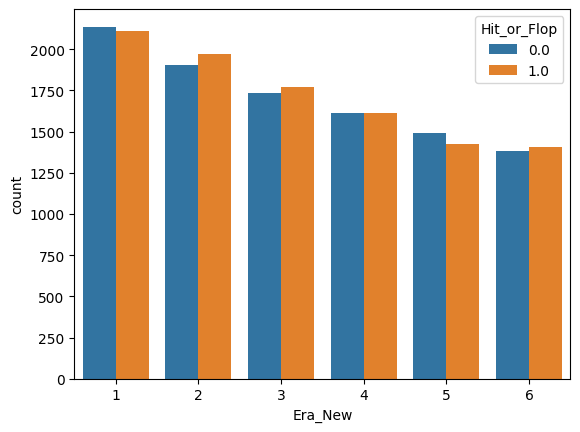

In [10]:
sns.countplot(x=sportify_new.Era_New,hue=sportify_new.Hit_or_Flop)

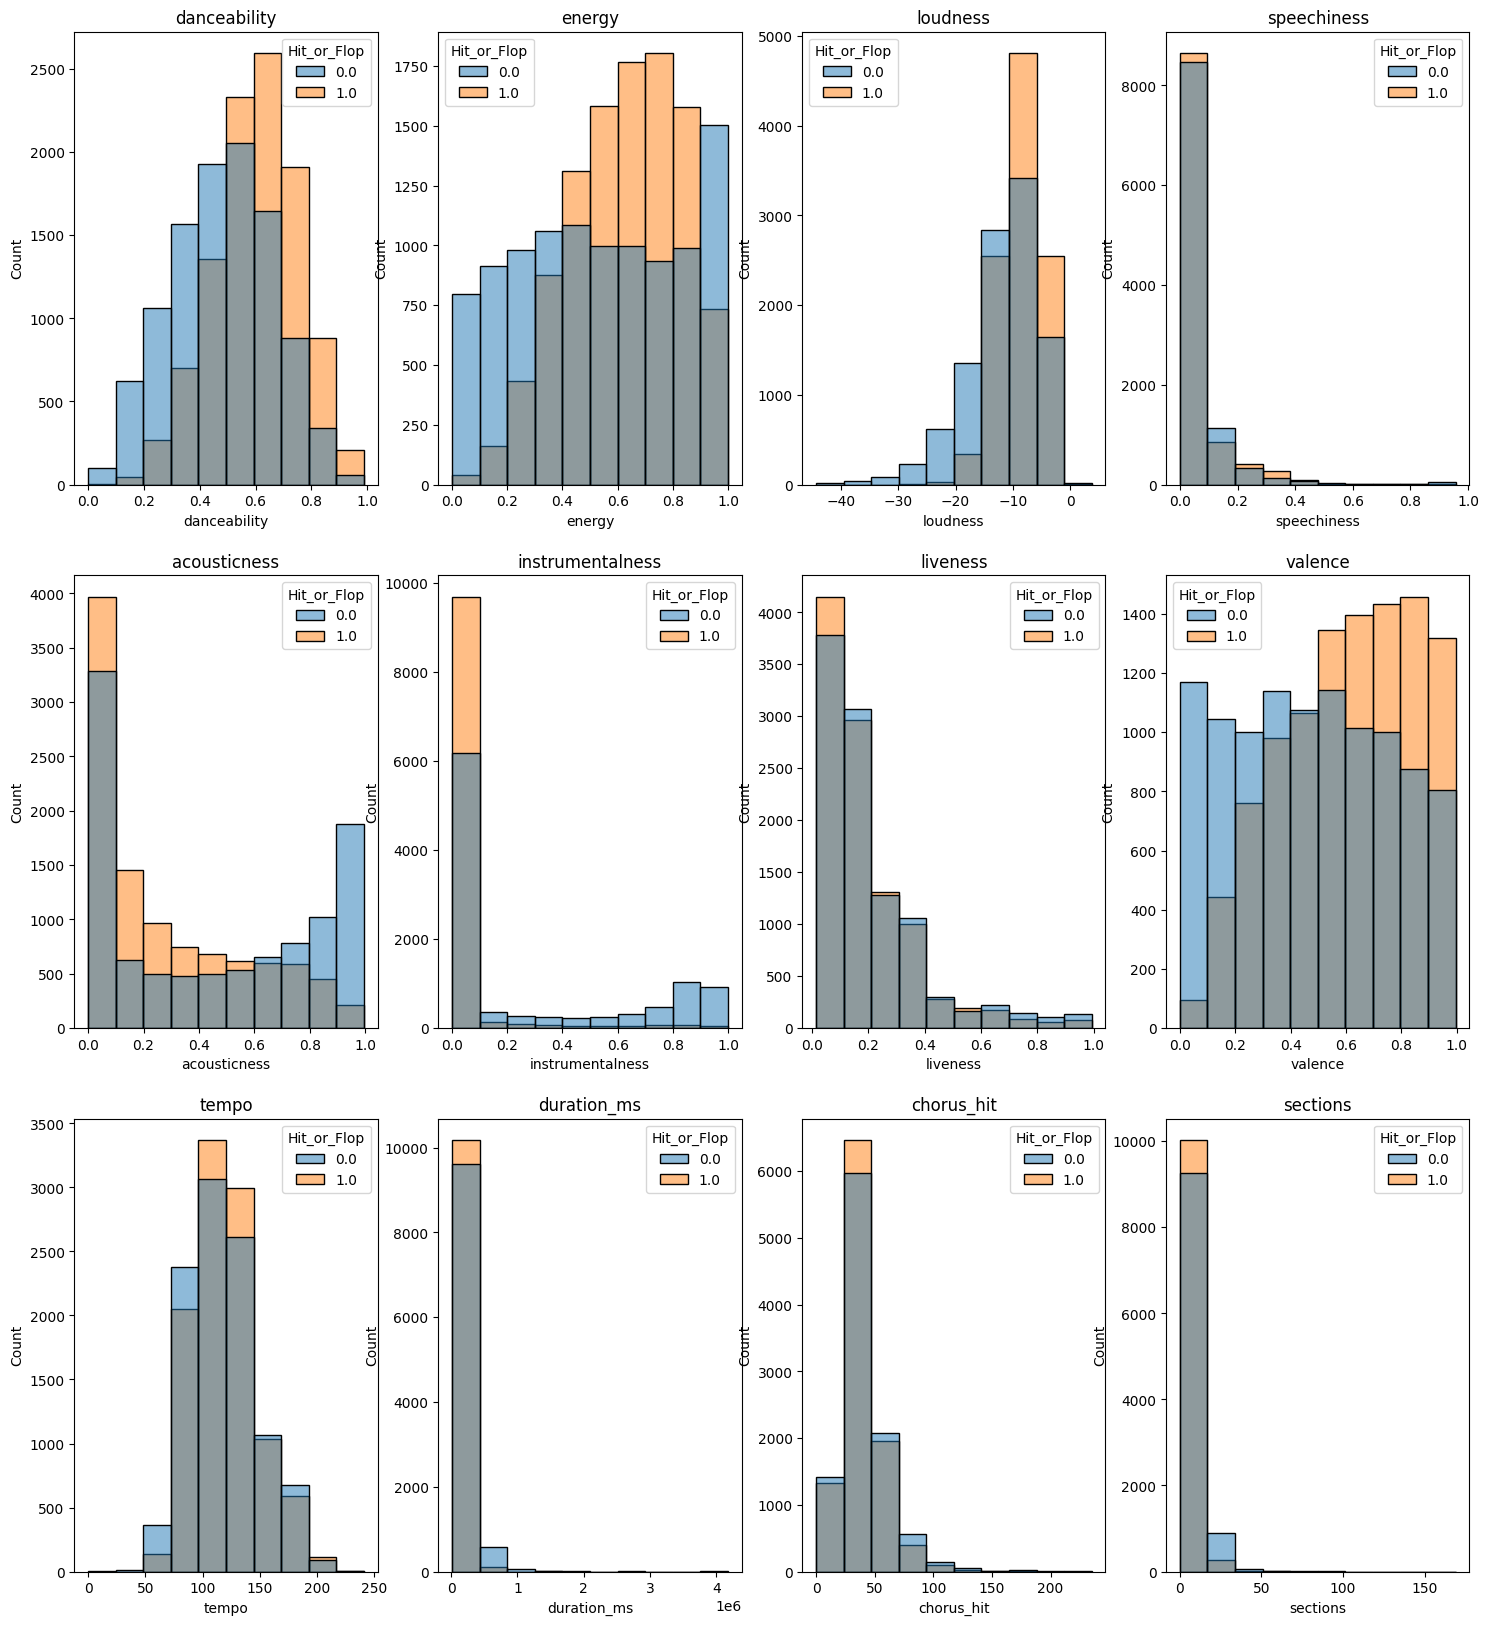

In [11]:
plt.figure(figsize=(18,20))
i = 1
for features in numeric:
    plt.subplot(3,4,i)
    sns.histplot(x=sportify_new[features],hue= sportify_new.Hit_or_Flop, bins=10).set_title(features)
    i=i+1
plt.show()

ValueError: num must be 1 <= num <= 4, not 5

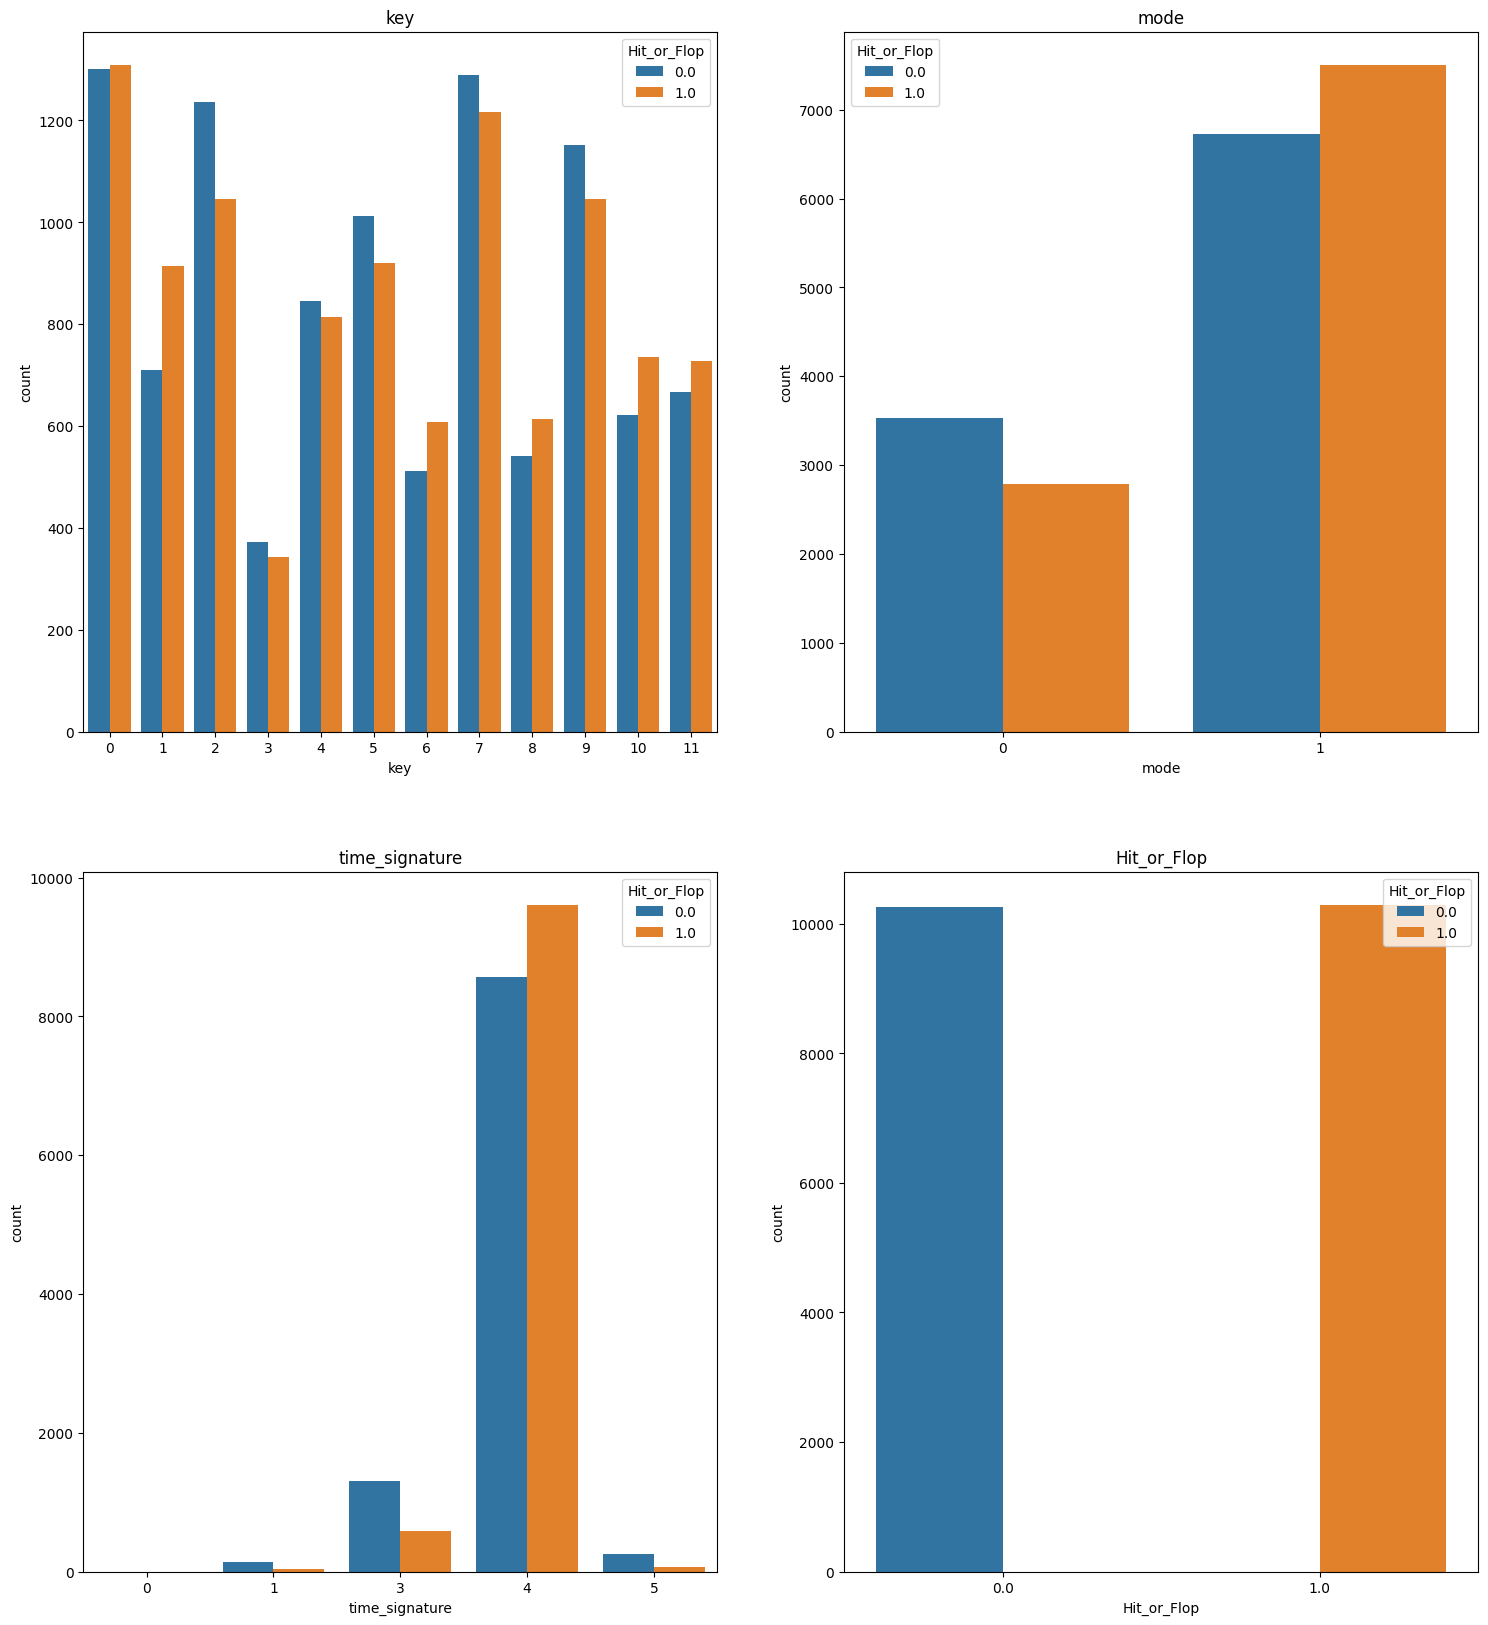

In [12]:
categorical = [x for x in sportify_new.columns if sportify_new[x].nunique()< 15]
plt.figure(figsize=(18,20))
i = 1
for features in categorical[:-1]:
    plt.subplot(2,2,i)
    sns.countplot(x=sportify_new[features],hue=sportify_new.Hit_or_Flop).set_title(features)
    i=i+1
plt.show()

In [13]:
sportify_df['time_signature4']      = 0
sportify_df['Important_Key'] = 0
sportify_df['loudness_new'] = 0
sportify_df['energy_new'] = 0
sportify_df['dance_new'] = 0
sportify_df['speech_new'] = 0
sportify_df['instru_new'] = 0
sportify_df['liveness_new'] = 0
sportify_df['valence_new'] = 0
sportify_df['tempo_new'] = 0
sportify_df['duration_new'] = 0
sportify_df['chorus_new'] = 0
sportify_df['sections_new'] = 0
sportify_df['acc_new'] = 0

for index, value in sportify_df.iterrows():
    if sportify_df.loc[index, 'time_signature'] == 4:
        sportify_df.loc[index, 'time_signature4'] = 1
    if sportify_df.loc[index, 'key'] == 1 or sportify_df.loc[index, 'key'] == 6 or sportify_df.loc[index, 'key'] == 8 or sportify_df.loc[index, 'key'] == 10 or sportify_df.loc[index, 'key'] == 11:
        sportify_df.loc[index, 'Important_Key'] = 1
    if sportify_df.loc[index, 'loudness'] > -10:
        sportify_df.loc[index, 'loudness_new'] = 1
    if sportify_df.loc[index, 'energy'] > 0.4 and sportify_df.loc[index, 'energy'] < 0.9:
        sportify_df.loc[index, 'energy_new'] = 1
    if sportify_df.loc[index, 'danceability'] > 0.5:
        sportify_df.loc[index, 'dance_new'] = 1
    if sportify_df.loc[index, 'speechiness'] > 0.2:
        sportify_df.loc[index, 'speech_new'] = 1
    if sportify_df.loc[index, 'instrumentalness'] < 0.1:
        sportify_df.loc[index, 'instru_new'] = 1
    if sportify_df.loc[index, 'liveness'] < 0.1:
        sportify_df.loc[index, 'liveness_new'] = 1 
    if sportify_df.loc[index, 'valence'] > 0.5:
        sportify_df.loc[index, 'valence_new'] = 1
    if sportify_df.loc[index, 'tempo'] > 100 and sportify_df.loc[index, 'tempo'] < 150:
        sportify_df.loc[index, 'tempo_new'] = 1
    if sportify_df.loc[index, 'duration_ms'] < 500000:
        sportify_df.loc[index, 'duration_new'] = 1
    if sportify_df.loc[index, 'chorus_hit'] > 25 and sportify_df.loc[index, 'chorus_hit'] < 50:
        sportify_df.loc[index, 'chorus_new'] = 1
    if sportify_df.loc[index, 'sections'] < 25:
        sportify_df.loc[index, 'sections_new'] = 1
    if sportify_df.loc[index, 'acousticness'] < 0.6:
        sportify_df.loc[index, 'acc_new'] = 1    
         
        
        

In [35]:
sportify_df[ sportify_df['set']   == 'Testing' ].to_csv(path_or_buf = 'testdata.csv')

In [14]:
sportify_df['Best_songs'] = 0
for index, value in sportify_df.iterrows():
    if (sportify_df.loc[index, 'instru_new'] == 1) and (sportify_df.loc[index, 'dance_new'] == 1):
        sportify_df.loc[index, 'Best_songs'] = 1

In [15]:
sportify_df.columns

Index(['index', 'track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chorus_hit', 'sections', 'Hit_or_Flop', 'Era', 'id', 'set', 'Era_New',
       'time_signature4', 'Important_Key', 'loudness_new', 'energy_new',
       'dance_new', 'speech_new', 'instru_new', 'liveness_new', 'valence_new',
       'tempo_new', 'duration_new', 'chorus_new', 'sections_new', 'acc_new',
       'Best_songs'],
      dtype='object')

In [16]:
# instantiating a correlation matrix
sportify_corr = sportify_df[ sportify_df['set']   == 'Training' ].corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
sportify_corr.loc[ : , 'Hit_or_Flop' ].sort_values(ascending = False)#.apply(func = abs)

Hit_or_Flop         1.00
instru_new          0.40
Best_songs          0.38
danceability        0.35
energy_new          0.31
dance_new           0.30
loudness            0.29
acc_new             0.27
valence             0.25
loudness_new        0.21
valence_new         0.21
energy              0.19
time_signature4     0.15
duration_new        0.12
sections_new        0.11
time_signature      0.10
mode                0.08
liveness_new        0.07
tempo_new           0.07
Important_Key       0.06
chorus_new          0.04
tempo               0.04
speech_new          0.03
index               0.01
key                 0.01
Era_New            -0.00
id                 -0.00
chorus_hit         -0.04
speechiness        -0.04
liveness           -0.05
sections           -0.06
duration_ms        -0.07
acousticness       -0.25
instrumentalness   -0.40
Name: Hit_or_Flop, dtype: float64

<h2>Logistics Regression</h2>

In [ ]:
#dropping some columns which are not important
sportify_data = sportify_df[ sportify_df['set']   == 'Training' ].drop(columns=["index", "track", "artist","uri",
                         "set", "Hit_or_Flop", "Era"], axis=1)

sportify_target = sportify_df["Hit_or_Flop"][ sportify_df['set']   == 'Training' ]
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            sportify_data, #x_data
            sportify_target, #y_data
            test_size    = 0.25,
            random_state = 123,
            stratify     = sportify_target) # preserving balance


# merging training data for statsmodels
sportify_train = pd.concat([x_train, y_train], axis = 1)
#a loop to print all the columns in titanic data
for val in sportify_data:
    print(f" {val} + ")

In [ ]:
# instantiating a logistic regression model object and eliminating features with p_value above 0.05
logistic_full = smf.logit(formula = """Hit_or_Flop ~      
danceability + 
 energy + 
 key + 
 loudness + 
 mode + 
 speechiness + 
 acousticness + 
 instrumentalness + 
 liveness + 
 valence + 
 tempo + 
 duration_ms + 
 time_signature + 
 chorus_hit + 
 sections + 
 id + 
 Era_New + 
 time_signature4 + 
 Important_Key + 
 loudness_new + 
 energy_new + 
 dance_new + 
 speech_new + 
 instru_new + 
 liveness_new + 
 valence_new + 
 tempo_new + 
 duration_new + 
 chorus_new + 
 sections_new + 
 acc_new
 """,
                                        data = sportify_train)


# fitting the model object
results_full = logistic_full.fit()

# checking the results SUMMARY
results_full.summary2()

In [ ]:
#creating a dictionary with significant ols below p value 0.05
candidate_dict = {
 # significant logistic model variables
  'sig_full' : ["danceability",  "loudness","valence", "acousticness", "energy", "instrumentalness"]}

# train/test split with the significant model
sportify_data   =  sportify_df.loc[ : , candidate_dict['sig_full']][ sportify_df['set']   == 'Training' ]
sportify_target =  sportify_df.loc[ : , 'Hit_or_Flop'][ sportify_df['set']   == 'Training' ]
x_test_data = sportify_df.loc[ : , candidate_dict['sig_full']][ sportify_df['set']   == 'Testing' ]

# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            sportify_data,
            sportify_target,
            test_size    = 0.25,
            random_state = 123,
            stratify     = sportify_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 123)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# PREDICTING on new data
model_pred = logreg.predict(x_test_data)

#storing results
x_test_data_predict = model_pred

# saving predictions with their respective Ids from the test set
predictions_log = pd.DataFrame(data = { 'id' : sportify_test['id'],
                                    'Hit_or_Flop' : model_pred.astype(bool)} )

# sending predictions to .csv file
predictions_log_data = predictions_log.to_csv(path_or_buf = 'submission1.csv',
                   index = False)                                       
                                   
                                   
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()
# SCORING the results
print(f"""                         Logistic Regression

Training ACCURACY:         {logreg_fit.score(x_train, y_train).round(4)}
Testing  ACCURACY:         {logreg_fit.score(x_test, y_test).round(4)}
Train-Test Gap:            {abs(logreg_fit.score(x_train, y_train) - logreg_fit.score(x_test, y_test)).round(4)}
ROC_AUC_SCORE:             {roc_auc_score(y_true  = y_test, y_score = logreg_pred).round(decimals = 4)}
 
Confusion Matrix:          True Negatives : {logreg_tn}
                           False Positives: {logreg_fp}
                           False Negatives: {logreg_fn}
                           True Positives : {logreg_tp}
""")


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy
# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)


<h2>Gradient Boosting Classifier</h2>

In [27]:
# setting explanatory variable(s) with most correlated x-variable
x_train = sportify_df[["danceability", 
 "energy",
 "loudness",
 "mode",
 "speechiness", 
 "acousticness",
 "instrumentalness",
 "valence",
 "tempo",
 "duration_ms", 
 "id",
 "time_signature4", 
 "Important_Key",
 "loudness_new", 
 "dance_new",
 "speech_new",
 "instru_new", 
 "tempo_new", 
 "duration_new",  
 "sections_new",
 "acc_new","Best_songs" 
                      ]].copy()[ sportify_df['set'] == 'Training' ]

# setting response variable
y_train = sportify_df['Hit_or_Flop'][ sportify_df['set']   == 'Training' ]

# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

#Gradient Boosting
# specifying a model name
model_name = 'Unpruned Gradient Boosting Classifier'
ugbc = GradientBoostingClassifier()

# FITTING the training data
ugbc_fit = ugbc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
ugbc_train_pred = ugbc_fit.predict(x_train_1)
ugbc_valid_pred = ugbc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
ugbc_train_score = ugbc.score(x_train_1, y_train_1).round(4) # using R-square
ugbc_test_score  = ugbc.score(x_train_2, y_train_2).round(4)   # using R-square
ugbc_gap         = abs(ugbc_train_score - ugbc_test_score).round(4)

# SCORING the results (auc)
ugbc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = ugbc_train_pred).round(decimals = 4)

ugbc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = ugbc_valid_pred).round(decimals = 4)
#setting the variables for x_test
x_test = sportify_df[[ 
 "danceability", 
 "energy",
 "loudness",
 "mode",
 "speechiness", 
 "acousticness",
 "instrumentalness",
 "valence",
 "tempo",
 "duration_ms", 
 "id",
 "time_signature4", 
 "Important_Key",
 "loudness_new", 
 "dance_new",
 "speech_new",
 "instru_new", 
 "tempo_new", 
 "duration_new",  
 "sections_new",
 "acc_new", 
    "Best_songs"
                      ]].copy()[ sportify_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = ugbc.predict(x_test)

# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'id' : sportify_test['id'],
                                    'Hit_or_Flop' : model_pred.astype(bool)               } )

# storing results the results
predictions_ugbc = predictions.to_csv(path_or_buf = 'success1.csv')

print (f"""
    Model Type       : {model_name}
    Training ACCURACY: {ugbc_train_score}
    Testing ACCURACY : {ugbc_test_score}
    Train-Test Gap   : {ugbc_gap}
    AUC Train        : {ugbc_train_auc}
    AUC Test         : {ugbc_valid_auc}
    """)


    Model Type       : Unpruned Gradient Boosting Classifier
    Training ACCURACY: 0.8072
    Testing ACCURACY : 0.7904
    Train-Test Gap   : 0.0168
    AUC Train        : 0.8071
    AUC Test         : 0.7903
    


<h2>Gradient Boosting Classifier HyperTuning</h2>

In [ ]:
# Fitting it in the train_set
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
             x_train,
             y_train,
             random_state = 123,
             test_size    = 0.25,
             stratify     = y_train)

#Gradient Boosting
# declaring a hyperparameter space
criterion_range             = ['friedman_mse', 'squared_error', 'mse']
loss_range                  = ['exponential', 'deviance']
depth_range                 = range(1, 9, 1)
leaf_range                  = range(1, 50, 1)
min_samples_split_range      = range(1,20,1)

#creating a hyperparameter grid
param_grid = {'criterion'       : criterion_range,
             'loss'              : loss_range,
             'max_depth'         : depth_range,
             'min_samples_leaf'  : leaf_range,
             'min_samples_split' : min_samples_split_range}


model_name = 'Pruned Gradient Boosting Classifier'

# INSTANTIATING a classification tree object
gradient_boosting = GradientBoostingClassifier(random_state = 219)

# RandomizedSearchCV object
gradient_boosting_cv = RandomizedSearchCV(estimator   = gradient_boosting,
                                          param_distributions   = param_grid,
                                          cv                    = 8,
                                          n_iter                = 10,
                                          random_state          = 123,
                                          scoring               = 'roc_auc')

# FITTING the training data
gradient_boosting_fit = gradient_boosting_cv.fit(x_train_1, y_train_1)

# PREDICTING on the response variable
model_train_pred = gradient_boosting_fit.predict(x_train_1)
model_valid_pred = gradient_boosting_fit.predict(x_train_2)

# saving scoring data for future use
gradient_boosting_train_score = gradient_boosting_fit.score(x_train_1, y_train_1).round(4) # accuracy

gradient_boosting_test_score  = gradient_boosting_fit.score(x_train_2, y_train_2).round(4)   # accuracy

gradient_boosting_model_gap   = abs(gradient_boosting_train_score - 
                             gradient_boosting_test_score).round(4)

# saving AUC
gradient_boosting_train_auc_score   = roc_auc_score(y_true  = y_train_1,
                                    y_score = model_train_pred).round(4) # auc
gradient_boosting_test_auc_score   = roc_auc_score(y_true  = y_train_2,
                                     y_score = model_valid_pred).round(4) # auc

gradient_boosting_cv.best_params_



In [28]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

#Gradient Boosting
# specifying a model name
model_name = 'Gradient Boosting Classifier'

# INSTANTIATING the model object without hyperparameters
ugbc = GradientBoostingClassifier(loss          = 'exponential',
                                    min_samples_split= 12,
                                    min_samples_leaf= 44,
                                    criterion     = 'squared_error',
                                    max_depth     = 7,
                                    random_state  = 123)

# FITTING the training data
ugbc_fit = ugbc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
ugbc_train_pred = ugbc_fit.predict(x_train_1)
ugbc_valid_pred = ugbc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
ugbc_train_score = ugbc.score(x_train_1, y_train_1).round(4) # using R-square
ugbc_test_score  = ugbc.score(x_train_2, y_train_2).round(4)   # using R-square
ugbc_gap         = abs(ugbc_train_score - ugbc_test_score).round(4)

# SCORING the results (auc)
ugbc_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = ugbc_train_pred).round(decimals = 4)

ugbc_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = ugbc_valid_pred).round(decimals = 4)

# unpacking the confusion matrix
ugbc_tn, \
ugbc_fp, \
ugbc_fn, \
ugbc_tp = confusion_matrix(y_true = y_train_2, y_pred = ugbc_valid_pred).ravel()

#setting the variables for x_test
x_test = sportify_df[["danceability", 
 "energy",
 "loudness",
 "mode",
 "speechiness", 
 "acousticness",
 "instrumentalness",
 "valence",
 "tempo",
 "duration_ms", 
 "id",
 "time_signature4", 
 "Important_Key",
 "loudness_new", 
 "dance_new",
 "speech_new",
 "instru_new", 
 "tempo_new", 
 "duration_new",  
 "sections_new",
 "acc_new", 
 "Best_songs"
                      ]].copy()[ sportify_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = ugbc.predict(x_test)

# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'id' : sportify_test['id'],
                                    'Hit_or_Flop' : model_pred.astype(bool)               } )

# storing results the results
predictions_ugbc = predictions.to_csv(path_or_buf = 'bad.csv',
                   index = False)

# PREDICTING on new data
model_pred = ugbc.predict(x_test)
print (f"""
    Model Type       : {model_name}
    Training ACCURACY: {ugbc_train_score}
    Testing ACCURACY : {ugbc_test_score}
    Train-Test Gap   : {ugbc_gap}
    AUC Train        : {ugbc_train_auc}
    AUC Test         : {ugbc_valid_auc}
    Confusion Matrix:             True Negatives : {ugbc_tn}
                                  False Positives: {ugbc_fp}
                                  False Negatives: {ugbc_fn}
                                  True Positives : {ugbc_tp}
    """)


    Model Type       : Gradient Boosting Classifier
    Training ACCURACY: 0.8783
    Testing ACCURACY : 0.8056
    Train-Test Gap   : 0.0727
    AUC Train        : 0.8782
    AUC Test         : 0.8055
    Confusion Matrix:             True Negatives : 1917
                                  False Positives: 649
                                  False Negatives: 350
                                  True Positives : 2223
    


In [ ]:
ugbc.predict(x_test)

In [ ]:
ugbc.predict_proba(x_test)

In [ ]:
# probabilities of prediction for 1 (positive class)
predictions_df = pd.DataFrame(data = ugbc.predict_proba(x_test))

# renaming columns
predictions_df.columns = ['negative', 'positive']

predictions_df.loc[ : , 'positive']

In [ ]:
# joining predictions with y_test
new = predictions_df.join(pd.Series(sportify_test['id'].reset_index(drop = True)))

In [ ]:
# changing the prediction threshold

# placeholder column
new['predictions_at_50'] = 0


# looping to flag at 0.60 for positive class
for index, column in new.iterrows():
    
    if  new.loc[ index, 'positive' ] >= 0.50:
        new.loc[ index , 'predictions_at_50'] = 1
                                   
new.to_csv(path_or_buf = 'Team_4_threshhold2.csv')
# outputting AUC score (p = 0.60 for positive class)
#roc_auc_score(y_true  = y_train_2,
#                        y_score = predictions_df['predictions_at_50']).round(4) # auc

In [ ]:
# original AUC score (p = 0.50 for positive class)
roc_auc_score(y_true  = y_test,
                        y_score = ugbc).round(4) # auc

In [29]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

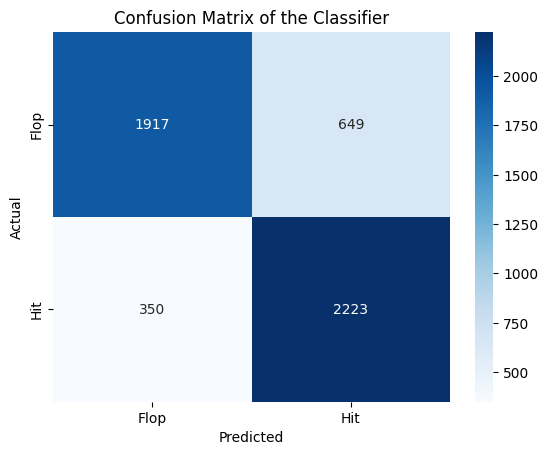

In [30]:
# calling the visual_cm function
visual_cm(true_y = y_train_2,
          pred_y = ugbc_valid_pred,
          labels = ['Flop', 'Hit'])

In [31]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train_1.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Hit_or_Flop.png')

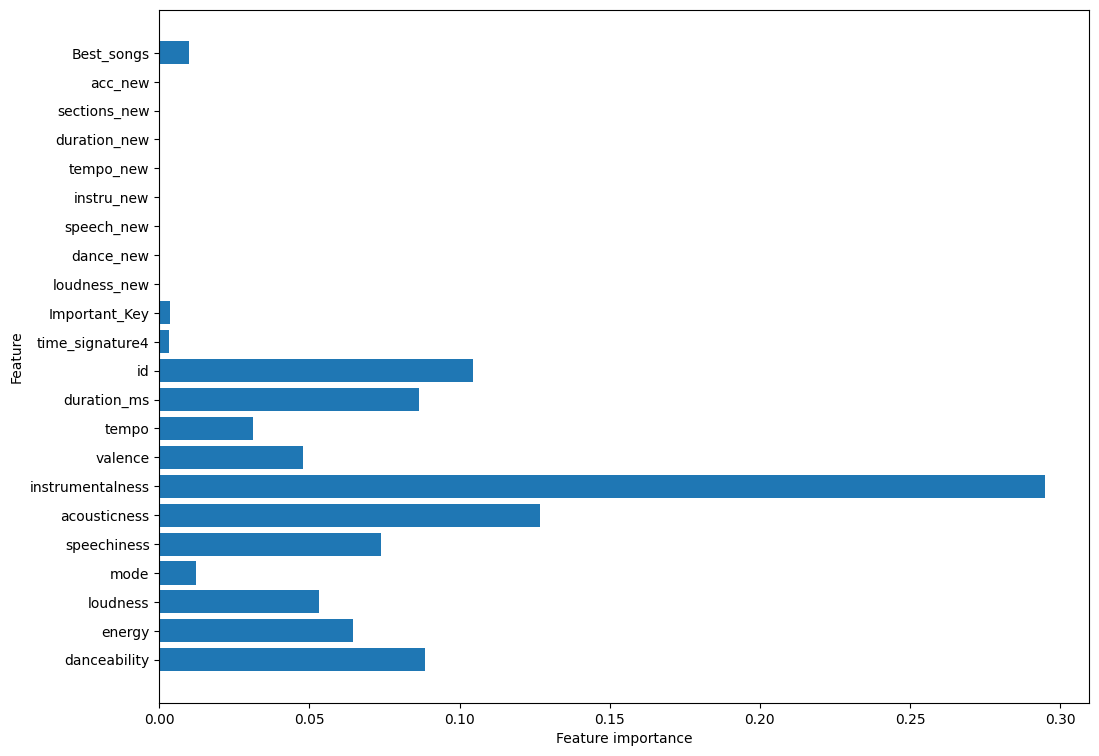

In [32]:
# plotting feature importance
plot_feature_importances(ugbc,
                         train = x_train_1,
                         export = False)

In [33]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier(max_depth = 3)


# FITTING the training data
full_tree_fit = full_tree.fit(x_train_1, y_train_1)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_train_2)



print('Full Tree AUC Score:', roc_auc_score(y_true  = y_train_2,
                                            y_score = full_tree_pred).round(4))

Full Tree AUC Score: 0.7338


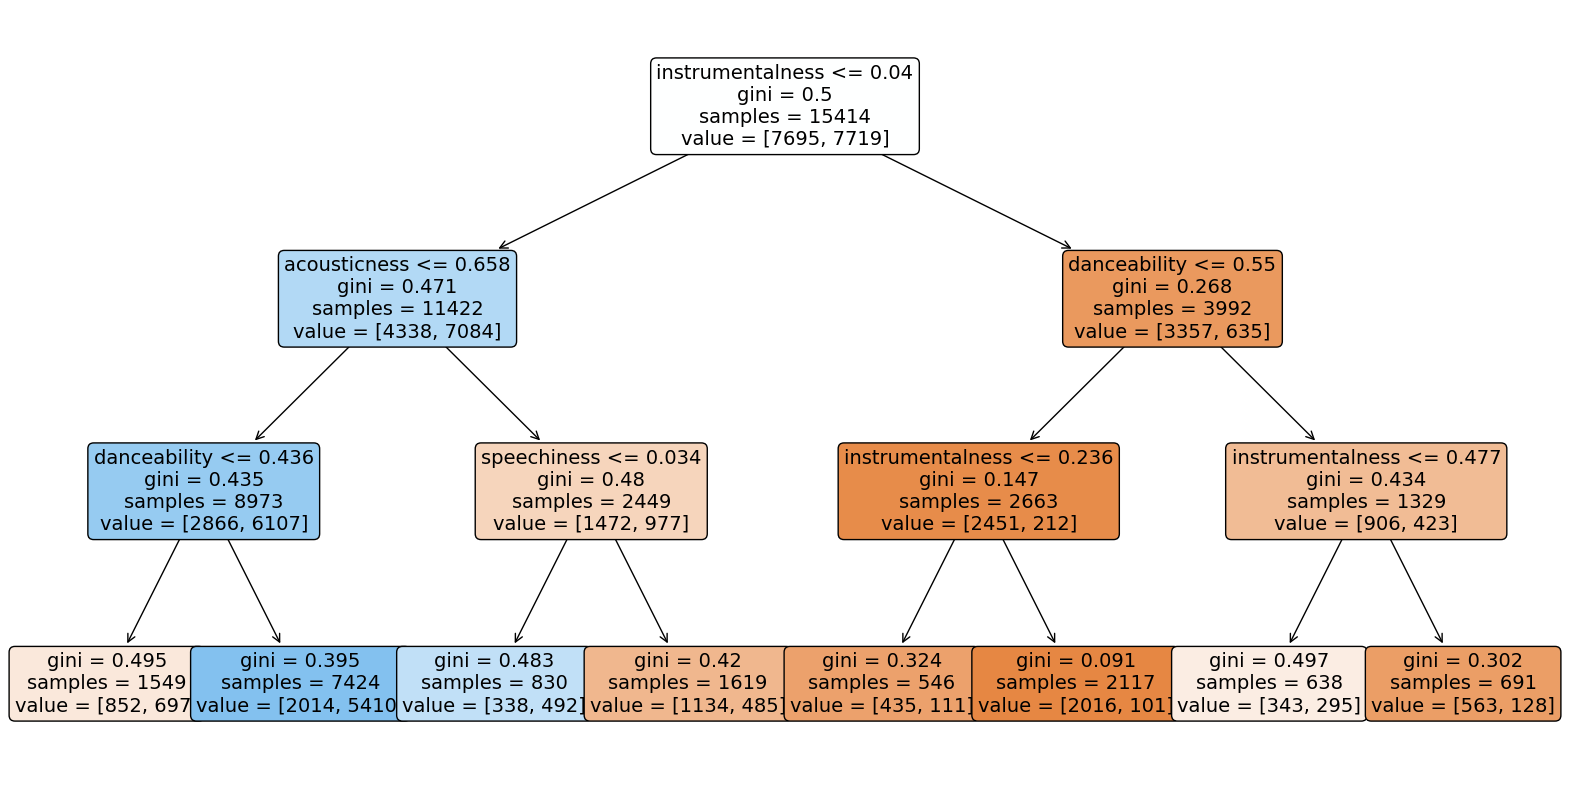

In [34]:


# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, # changing to pruned_tree_fit
          feature_names = x_train_1.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<br>